In [1]:
import sys, os
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from scipy.stats import bayes_mvs as bayesest
import time

sys.path.insert(0, '../../')
from simulator import Simulator


%matplotlib inline

In [2]:
mean_size = 3 # micron
doubling_time = 18 #min
tmax = 180 #min
sample_time = 2 #min
div_steps = 10 
ncells = 5000

In [3]:
gr = np.log(2)/doubling_time 

In [4]:
CV2div = 0.001
CV2gr = 0.01
CV2sz = 0.015
v0 = mean_size*np.random.gamma(shape=1/CV2sz,scale=CV2sz,size=ncells)

In [5]:
if not os.path.exists('./data'):
    os.makedirs('./data') #data path
if not os.path.exists('./figures'):
    os.makedirs('./figures') #Figures path

In [7]:
start = time.time()
sim = Simulator(ncells=ncells, gr = gr, sb=mean_size, steps = div_steps, CV2div = CV2div, CV2gr = CV2gr, V0array = v0)
sim.szdyn(tmax = tmax, sample_time= 0.1*doubling_time, nameCRM = "./data/dataCRMnoisy.csv")
print('It took', np.int(time.time()-start), 'seconds.')

Cells initialized
Cells initialized
1%
10%
20%
30%
40%
50%
60%
70%
80%
90%
100%
It took 7 seconds.


In [9]:
data1=pd.read_csv("./data/dataCRMnoisy.csv")
timearray=data1.time.unique()

mnszarray=[]
cvszarray=[]
errcv2sz=[]
errmnsz=[]
df=data1
del df['time']
for m in range(len(df)):
    szs=df.loc[m, :].values.tolist()
    mean_cntr, var_cntr, std_cntr = bayesest(szs,alpha=0.95)
    mnszarray.append(np.mean(szs))
    errmnsz.append(mean_cntr[1][1]-mean_cntr[0])
    cvszarray.append(np.var(szs)/np.mean(szs)**2)
    errv=(var_cntr[1][1]-var_cntr[0])/mean_cntr[0]**2+2*(mean_cntr[1][1]-mean_cntr[0])*var_cntr[0]/mean_cntr[0]**3
    errcv2sz.append(errv)

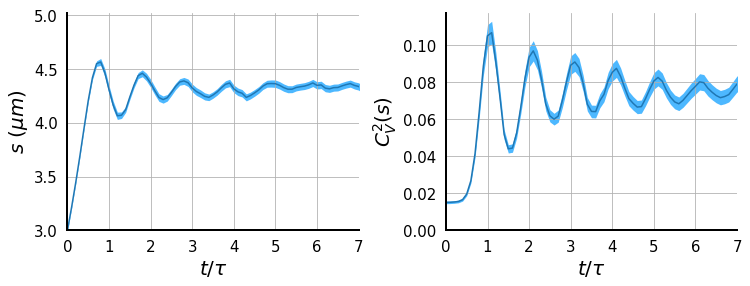

In [10]:
fig, ax = plt.subplots(1,2, figsize=(12,4))
ax[0].plot(np.array(timearray)/doubling_time,np.array(mnszarray))
ax[0].fill_between(np.array(timearray)/doubling_time,np.array(mnszarray)-np.array(errmnsz),np.array(mnszarray)+np.array(errmnsz),
                 alpha=1, edgecolor='#4db8ff', facecolor='#4db8ff',linewidth=0,label="SSA")


ax[1].plot(np.array(timearray)/doubling_time,np.array(cvszarray))
ax[1].fill_between(np.array(timearray)/doubling_time,np.array(cvszarray)-np.array(errcv2sz),np.array(cvszarray)+np.array(errcv2sz),
                 alpha=1, edgecolor='#4db8ff', facecolor='#4db8ff',linewidth=0)
ax[0].set_ylabel("$s$ $(\mu m)$",size=20)
ax[1].set_ylabel("$C_V^2(s)$",size=20)
ax[0].set_xlabel(r"$t/\tau$",size=20)
ax[1].set_xlabel(r"$t/\tau$",size=20)
ax[0].set_ylim([np.min(mnszarray),1.1*np.max(mnszarray)])
ax[1].set_ylim([0,1.1*np.max(cvszarray)])
for l in [0,1]:
    ax[l].set_xlim([0,7])
    taqui=np.arange(0,8,step=1)
    ax[l].set_xticks(np.array(taqui))
    ax[l].grid()
    ax[l].tick_params(axis='x', labelsize=15)
    ax[l].tick_params(axis='y', labelsize=15)
    for axis in ['bottom','left']:
        ax[l].spines[axis].set_linewidth(2)
        ax[l].tick_params(axis='both', width=2,length=6)
    for axis in ['top','right']:
        ax[l].spines[axis].set_linewidth(0)
        ax[l].tick_params(axis='both', width=0,length=6)
plt.subplots_adjust(hspace=0.3,wspace=0.3)
if not os.path.exists('./figures'):
    os.makedirs('./figures')
#ax[0].legend(fontsize=15)
plt.savefig('./figures/size_statisticsnoisy.svg',bbox_inches='tight')
plt.savefig('./figures/size_statisticsnoisy.png',bbox_inches='tight')